# Análise do filtro RC passa-baixa com circuito integrador

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.fft import fft, fftfreq

In [38]:
sns.set_theme()

## Ganho e fase

In [231]:
def gain(w, w0): return 1 / np.sqrt(1 + (w/w0)**2)

In [232]:
R = 1000
C = 0.47E-6

In [233]:
w0 = 1 / (2 * np.pi * R * C)
w0

338.62753849339435

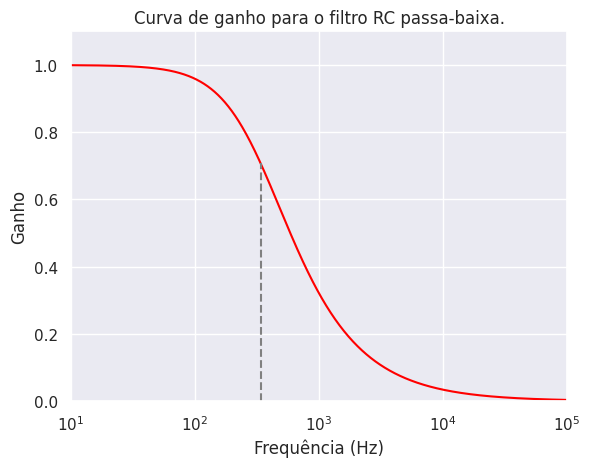

In [234]:
w = np.logspace(1, 5, 1000)

plt.title('Curva de ganho para o filtro RC passa-baixa.')
sns.lineplot(x=w, y=gain(w, w0), color='red')
plt.vlines(x=w0, ymin=0, ymax=gain(w0, w0), color='gray', linestyles='dashed')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Ganho')
plt.xscale('log')
plt.xlim(1E1, 1E5)
plt.ylim(0,1.1)
plt.show()

## Simulação para ondas quadradas

$f = 72 Hz$

In [244]:
freq	= 72
period	= 1 / freq

In [245]:
N = 1000
t = np.linspace(0, 3 * period, N)
dt = 3 * period / N

In [246]:
signal = np.zeros(N) + 1
for i in range(3): signal[(2*i+1)*(N//6):(2*i+2)*(N//6)] = np.zeros(N//6) - 1

In [247]:
xf = fftfreq(N//3, dt)
yf = fft(signal[:N//3])

In [248]:
n_signal = np.zeros(N)
for i in range(100):
	n_signal += (6/N) * np.abs(yf[i]) * np.sin(2 * np.pi * xf[i] * t)

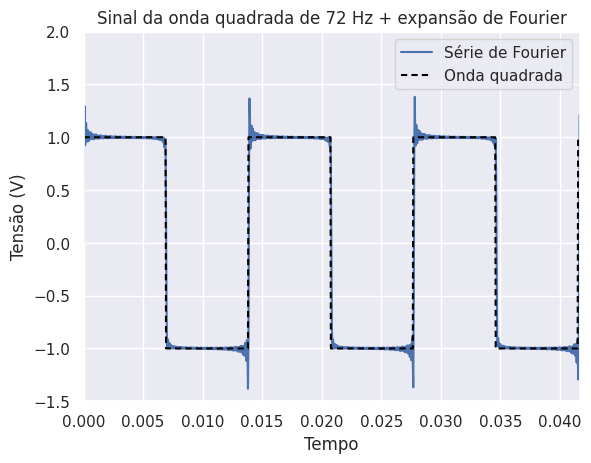

In [249]:
plt.title('Sinal da onda quadrada de 72 Hz + expansão de Fourier')
sns.lineplot(x=t, y=n_signal, label='Série de Fourier')
sns.lineplot(x=t, y=signal, label='Onda quadrada', color='black', dashes=(3,2))
plt.xlabel('Tempo')
plt.ylabel('Tensão (V)')
plt.xlim(0, 3 * period)
plt.ylim(-1.5, 2)
plt.legend()
plt.savefig('plots/freq_fourier_72.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

In [250]:
n_signal = np.zeros(N)
for i in range(100): n_signal += (6/N) * np.abs(yf[i]) * gain(xf[i], w0) * np.sin(2 * np.pi * xf[i] * t)

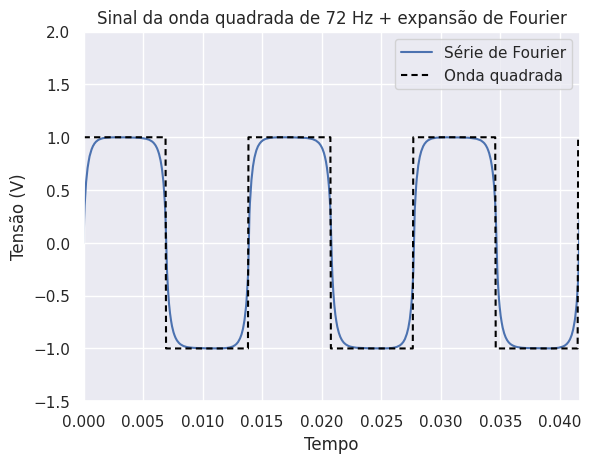

In [251]:
plt.title('Sinal da onda quadrada de 72 Hz + expansão de Fourier')
sns.lineplot(x=t, y=n_signal, label='Série de Fourier')
sns.lineplot(x=t, y=signal, label='Onda quadrada', color='black', dashes=(3,2))
plt.xlabel('Tempo')
plt.ylabel('Tensão (V)')
plt.xlim(0, 3 * period)
plt.ylim(-1.5, 2)
plt.legend()
#plt.savefig('plots/freq_fourier_72.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

$f = 360 Hz$

In [218]:
freq	= 360
period	= 1 / freq

In [219]:
N = 1000
t = np.linspace(0, 3 * period, N)
dt = 3 * period / N

In [220]:
signal = np.zeros(N) + 1
for i in range(3): signal[(2*i+1)*(N//6):(2*i+2)*(N//6)] = np.zeros(N//6) - 1

In [221]:
xf = fftfreq(N//3, dt)
yf = fft(signal[:N//3])

In [222]:
n_signal = np.zeros(N)
for i in range(100):
	n_signal += (6/N) * np.abs(yf[i]) * np.sin(2 * np.pi * xf[i] * t)

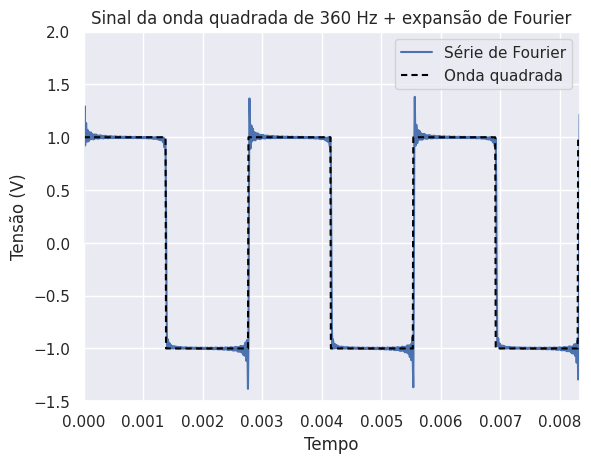

In [223]:
plt.title('Sinal da onda quadrada de 360 Hz + expansão de Fourier')
sns.lineplot(x=t, y=n_signal, label='Série de Fourier')
sns.lineplot(x=t, y=signal, label='Onda quadrada', color='black', dashes=(3,2))
plt.xlabel('Tempo')
plt.ylabel('Tensão (V)')
plt.xlim(0, 3 * period)
plt.ylim(-1.5, 2)
plt.legend()
plt.savefig('plots/freq_fourier_72.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

In [229]:
n_signal = np.zeros(N)
for i in range(100): n_signal += (6/N) * np.abs(yf[i]) * gain(xf[i], w0) * np.sin(2 * np.pi * xf[i] * t)

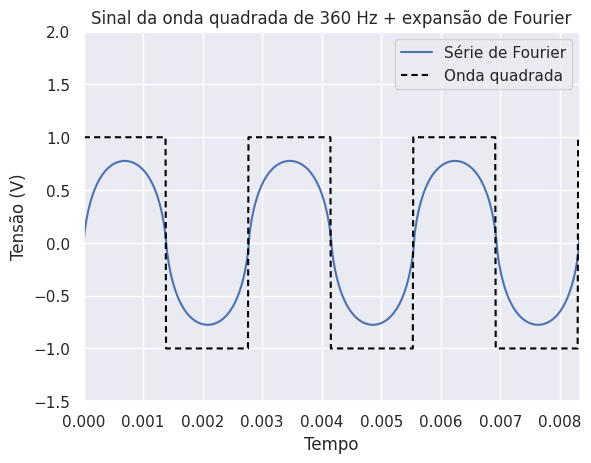

In [230]:
plt.title('Sinal da onda quadrada de 360 Hz + expansão de Fourier')
sns.lineplot(x=t, y=n_signal, label='Série de Fourier')
sns.lineplot(x=t, y=signal, label='Onda quadrada', color='black', dashes=(3,2))
plt.xlabel('Tempo')
plt.ylabel('Tensão (V)')
plt.xlim(0, 3 * period)
plt.ylim(-1.5, 2)
plt.legend()
#plt.savefig('plots/freq_fourier_72.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

$f = 7.2 kHz$

In [181]:
freq	= 7.2E3
period	= 1 / freq

In [182]:
N = 1000
t = np.linspace(0, 3 * period, N)
dt = 3 * period / N

In [183]:
signal = np.zeros(N) + 1
for i in range(3): signal[(2*i+1)*(N//6):(2*i+2)*(N//6)] = np.zeros(N//6) - 1

In [184]:
xf = fftfreq(N//3, dt)
yf = fft(signal[:N//3])

In [185]:
n_signal = np.zeros(N)
for i in range(100):
	n_signal += (6/N) * np.abs(yf[i]) * np.sin(2 * np.pi * xf[i] * t)

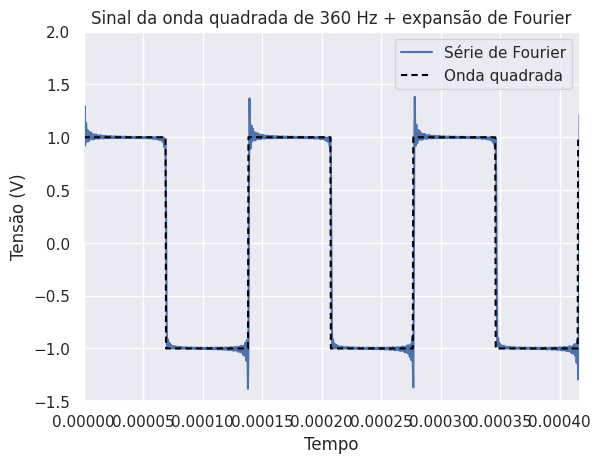

In [186]:
plt.title('Sinal da onda quadrada de 360 Hz + expansão de Fourier')
sns.lineplot(x=t, y=n_signal, label='Série de Fourier')
sns.lineplot(x=t, y=signal, label='Onda quadrada', color='black', dashes=(3,2))
plt.xlabel('Tempo')
plt.ylabel('Tensão (V)')
plt.xlim(0, 3 * period)
plt.ylim(-1.5, 2)
plt.legend()
plt.savefig('plots/freq_fourier_72.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()